In [1]:
import random_walker as rw
import utils
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


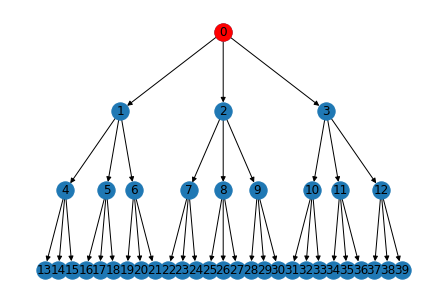

In [2]:
#Create a regular tree with set offspring factor and height above the root, with edges directed away from root.
offspring_factor=3
height=3
H=nx.generators.classic.balanced_tree(offspring_factor,height)
root=utils.list_degree_nodes(H,offspring_factor,1)[0]
H,_=utils.directify(H,root)
pos=graphviz_layout(H,prog='dot')
nx.draw(H,pos)
nx.draw_networkx_labels(H,pos)
nx.draw_networkx_nodes(H,pos,nodelist=[root],node_color='r',labels=True)
plt.show()

In [3]:
#In case we want to look at metrics other than Hamming
def metric(*args):
    return rw.hamming_dist(*args)

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


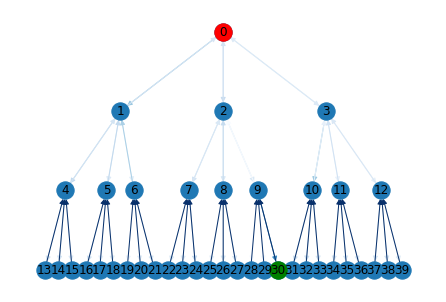

In [4]:
#Create patternWalker based on the above tree.
pattern_len=15 #String/pattern length
flip_rate=5/pattern_len #Bit flipping rate for propagating patterns
G=rw.patternWalker(H,root,pattern_len,flip_rate,metric=metric)
G.set_weights()
#pos=graphviz_layout(G,prog='dot') #Positions can be taken from H
(edges,weights) = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Blues)
nx.draw_networkx_labels(H,pos)
nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r')
#Mark target node in green.
nx.draw_networkx_nodes(G,pos,nodelist=[G.target_node],node_color='g')
plt.show()

In [13]:
print('Number of duplicate strings/Number of strings:', G.num_pattern_duplicates(),'/',len(G))
mfpts_root_leaves=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)])
print('target node:', G.target_node)
mfpts_root_leaves


Number of duplicate strings/Number of strings: 1 / 40
target node: 30


{(0, 13): (50.024342324342435+0j),
 (0, 14): (50.02434232434242+0j),
 (0, 15): (50.024342324342435+0j),
 (0, 16): (48.002120102120244+0j),
 (0, 17): (48.00212010212026+0j),
 (0, 18): (48.002120102120244+0j),
 (0, 19): (51.58134088134108+0j),
 (0, 20): (51.58134088134108+0j),
 (0, 21): (51.58134088134108+0j),
 (0, 22): (37.4113636363634+0j),
 (0, 23): (37.41136363636341+0j),
 (0, 24): (37.4113636363634+0j),
 (0, 25): (37.84772727272701+0j),
 (0, 26): (37.847727272727006+0j),
 (0, 27): (37.84772727272701+0j),
 (0, 28): (40.26136363636334+0j),
 (0, 29): (40.26136363636335+0j),
 (0, 30): (40.26136363636334+0j),
 (0, 31): (39.27820512820519+0j),
 (0, 32): (39.278205128205194+0j),
 (0, 33): (39.27820512820519+0j),
 (0, 34): (37.88931623931628+0j),
 (0, 35): (37.88931623931629+0j),
 (0, 36): (37.88931623931628+0j),
 (0, 37): (36.8594017094017+0j),
 (0, 38): (36.859401709401695+0j),
 (0, 39): (36.85940170940171+0j)}

In [14]:
#Now, get MFPT for all pairs (root, node)
mfpts_root_all={}
for branch in G.hierarchy_backup.successors(G.root):
    mfpts[branch]=utils.mfpt(G,[(root,b) for b in nx.descendants(G.hierarchy_backup,branch)])

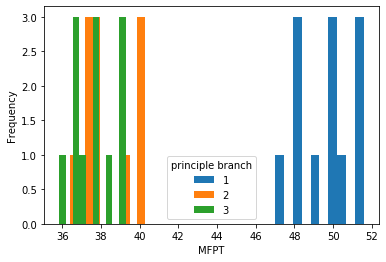

In [15]:
for branch in G.hierarchy_backup.successors(G.root):
    _=plt.hist(mfpts[branch].values(),label=str(branch))
plt.legend(loc='best', title='principle branch')
plt.xlabel('MFPT')
plt.ylabel('Frequency')
plt.show()

In [52]:
#We can also sample over a number realisations of patterns
mfpts_root_leaves_sampling=[]
down_c=[] #downward "current"
up_c=[] #upward "current"
for _ in range(200):
    G.reset_patterns()
    G.set_weights()
    t_temp=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)])
    d_temp=utils.downward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),nodelist=G.nodes())
    u_temp=utils.upward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),nodelist=G.nodes())
    for x in t_temp.values():
        mfpts_root_leaves_sampling.append(x)
    for x in d_temp:
        down_c.append(x)
    for x in u_temp:
        up_c.append(x)
down_c=np.array(down_c)
up_c=np.array(up_c)

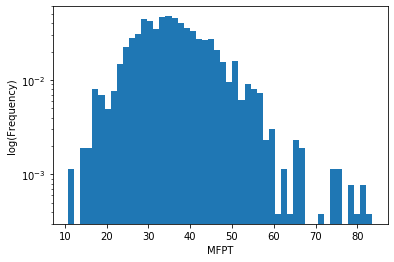

In [53]:
_=plt.hist(mfpts_root_leaves_sampling,bins=50,density=True)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('MFPT')
plt.ylabel('log(Frequency)')
plt.show()

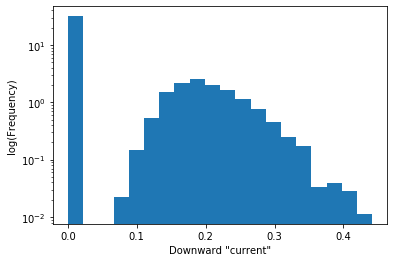

In [54]:
_=plt.hist(down_c,bins=20,density=True)
plt.xlabel('Downward "current"')
plt.ylabel('log(Frequency)')
plt.yscale('log')
#plt.xscale('log')
plt.show()

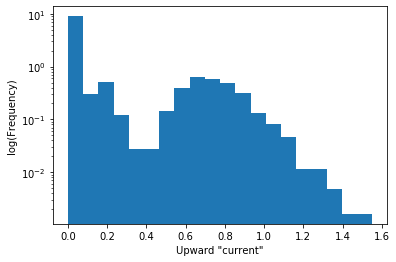

In [55]:
_=plt.hist(up_c,bins=20,density=True)
plt.xlabel('Upward "current"')
plt.ylabel('log(Frequency)')
plt.yscale('log')
#plt.xscale('log')
plt.show()